## Importing Libraries & Data

In [162]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [164]:
PATH = "psdata/"

In [165]:
!ls {PATH}

Bank Statement.csv


In [166]:
data = pd.read_csv(f'{PATH}Bank Statement.csv')

## Creating support Functions

In [167]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [168]:
?display()

In [169]:
def clean_col(inputlst):
    col_list = []
    for col in inputlst:
        col = col.strip()
        col = col.lower()
        col = col.replace(" ", "_")
        col = col.replace("(", "")
        col = col.replace(")", "")
        col = col.strip()
        col_list.append(col)
    return col_list

In [170]:
def clean_str(inputstr):
    floats = []
    for row in inputstr:
        row = row.replace("  ","0")
        floats.append(row)
    return floats

In [171]:
def clean_str2(inputstr):
    floats = []
    for row in inputstr:
        if row == "  ":
            row = row.replace("  ","0")
            floats.append(row)
        else:
            floats.append(row)
    return floats

In [172]:
def clean_ex(lst):
    clean_exg = []
    for row in lst:
        if row == 0:
            row = float(row)
            clean_exg.append(row)
        elif "EUR" in row:
            row = row.replace("EUR","")
            row = row.strip()
            row = float(row)
            clean_exg.append(row)
        elif "GBP" in row:
            row = row.replace("GBP"," ")
            row = row.strip()
            row = float(row)
            clean_exg.append(row)
    return clean_exg
            

## Inspecting Data

In [173]:
display_all(data)

,Completed Date,Description,Paid Out (GBP),Paid In (GBP),Exchange Out,Exchange In,Balance (GBP),Category,Notes
0,29-Jan-19,To Holidays,1.02,,,,362.07,transfers,
1,29-Jan-19,To Holidays,1.02,,,,363.09,transfers,
2,29-Jan-19,To Holidays,0.6,,,,364.11,transfers,
3,29-Jan-19,To Holidays,0.1,,,,364.71,transfers,
4,28-Jan-19,From Luca Mircoli,,5,,,457.30,transfers,
5,28-Jan-19,To Holidays,2,,,,452.30,transfers,
6,28-Jan-19,To Holidays,1.06,,,,454.30,transfers,
7,28-Jan-19,To Holidays,0.6,,,,455.36,transfers,
8,28-Jan-19,To Holidays,0.6,,,,455.96,transfers,
9,27-Jan-19,Payment from Grancharova T,,293,,,456.56,general,TV PAYMENT


In [174]:
display_all(data.describe(include='all'))

,Completed Date,Description,Paid Out (GBP),Paid In (GBP),Exchange Out,Exchange In,Balance (GBP),Category,Notes
count,2075,2075,2075,2062,2051,2051,2051.000000,1911,1911
unique,406,418,596,124,52,1,NaN,12,26
top,14-Jan-19,To Holidays,,,,,NaN,transfers,
freq,21,633,175,1887,1980,2051,NaN,778,1864
mean,NaN,NaN,NaN,NaN,NaN,NaN,230.484734,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,197.275795,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-2.330000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.440000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,190.610000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,329.135000,NaN,NaN


## Data Cleaning

In [175]:
data.columns

Index(['Completed Date ', ' Description ', ' Paid Out (GBP) ',
       ' Paid In (GBP) ', ' Exchange Out', ' Exchange In', ' Balance (GBP)',
       ' Category', ' Notes'],
      dtype='object')

#### Cleaning Columns Names

In [176]:
data.columns = clean_col(data.columns)
print(data.columns)

Index(['completed_date', 'description', 'paid_out_gbp', 'paid_in_gbp',
       'exchange_out', 'exchange_in', 'balance_gbp', 'category', 'notes'],
      dtype='object')


In [177]:
data.dtypes

completed_date     object
description        object
paid_out_gbp       object
paid_in_gbp        object
exchange_out       object
exchange_in        object
balance_gbp       float64
category           object
notes              object
dtype: object

#### Cleaning "description"

In [178]:
list(data["description"].head())

[' To Holidays   ',
 ' To Holidays   ',
 ' To Holidays   ',
 ' To Holidays   ',
 ' From Luca Mircoli  ']

In [179]:
data["description"] = clean_col(data["description"])
print(data["description"].head(10), data["description"].tail(10))

0                   to_holidays
1                   to_holidays
2                   to_holidays
3                   to_holidays
4             from_luca_mircoli
5                   to_holidays
6                   to_holidays
7                   to_holidays
8                   to_holidays
9    payment_from_grancharova_t
Name: description, dtype: object 2065                        to_lorenz_maresca
2066                   payment_from_l_maresca
2067                     transport_for_london
2068          payment_from_complete_accountin
2069    exchange_gbp_to__fx_rate_£1_=_€1.0748
2070                   payment_from_l_maresca
2071    exchange_gbp_to__fx_rate_£1_=_€1.0836
2072                   payment_from_l_maresca
2073                        card_delivery_fee
2074                     top-up_via_apple_pay
Name: description, dtype: object


#### Converting "paid_out_gbp" to float

In [180]:
data["paid_out_gbp"] = clean_str(data["paid_out_gbp"])

In [181]:
data["paid_out_gbp"] = data["paid_out_gbp"].astype(float)

In [182]:
data.dtypes

completed_date     object
description        object
paid_out_gbp      float64
paid_in_gbp        object
exchange_out       object
exchange_in        object
balance_gbp       float64
category           object
notes              object
dtype: object

#### Converting "paid_in_gbp" to float

In [183]:
data["paid_in_gbp"] = data["paid_in_gbp"].fillna(0)
data["paid_in_gbp"] = clean_str2(data["paid_in_gbp"])

In [184]:
data["paid_in_gbp"] = data["paid_in_gbp"].astype(float)

In [185]:
data.dtypes

completed_date     object
description        object
paid_out_gbp      float64
paid_in_gbp       float64
exchange_out       object
exchange_in        object
balance_gbp       float64
category           object
notes              object
dtype: object

#### Cleaning "exchange_out"

In [186]:
data["exchange_out"] = data["exchange_out"].fillna(0)

In [187]:
for i in data.columns:
    data[i][data[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [188]:
data["exchange_out"].value_counts().head()

0                24
  EUR 500.00      6
  EUR 150.00      4
  EUR 800.00      4
  EUR 200.00      4
Name: exchange_out, dtype: int64

In [189]:
data["exchange_out"] = data["exchange_out"].fillna(0)

In [190]:
data["exchange_out"].value_counts().head()

0                2004
  EUR 500.00        6
  EUR 150.00        4
  EUR 800.00        4
  EUR 200.00        4
Name: exchange_out, dtype: int64

In [191]:
data["exchange_out"] = clean_ex(data["exchange_out"])

In [192]:
data["exchange_out"].value_counts().head()

0.0      2004
500.0       6
100.0       5
200.0       5
150.0       5
Name: exchange_out, dtype: int64

In [193]:
data.dtypes

completed_date     object
description        object
paid_out_gbp      float64
paid_in_gbp       float64
exchange_out      float64
exchange_in        object
balance_gbp       float64
category           object
notes              object
dtype: object

#### Cleaning "exchange_in"

In [194]:
data["exchange_in"] = data["exchange_in"].fillna(0)

In [195]:
data["exchange_in"] =clean_ex(data["exchange_in"])

In [196]:
data["exchange_in"].value_counts()

0.0    2075
Name: exchange_in, dtype: int64

In [197]:
data.dtypes

completed_date     object
description        object
paid_out_gbp      float64
paid_in_gbp       float64
exchange_out      float64
exchange_in       float64
balance_gbp       float64
category           object
notes              object
dtype: object

#### Cleaning "balance_gdp"

In [198]:
data["balance_gbp"] = data["balance_gbp"].fillna(0)

#### Cleaning "date"

In [199]:
data["completed_date"] = pd.to_datetime(data["completed_date"])
data.dtypes

completed_date    datetime64[ns]
description               object
paid_out_gbp             float64
paid_in_gbp              float64
exchange_out             float64
exchange_in              float64
balance_gbp              float64
category                  object
notes                     object
dtype: object

In [200]:
add_datepart(data, 'completed_date')
data.head()

,description,paid_out_gbp,paid_in_gbp,exchange_out,exchange_in,balance_gbp,category,notes,completed_Year,completed_Month,...,completed_Day,completed_Dayofweek,completed_Dayofyear,completed_Is_month_end,completed_Is_month_start,completed_Is_quarter_end,completed_Is_quarter_start,completed_Is_year_end,completed_Is_year_start,completed_Elapsed
0,to_holidays,1.02,0.0,0.0,0.0,362.07,transfers,None,2019,1,...,29,1,29,False,False,False,False,False,False,1548720000
1,to_holidays,1.02,0.0,0.0,0.0,363.09,transfers,None,2019,1,...,29,1,29,False,False,False,False,False,False,1548720000
2,to_holidays,0.60,0.0,0.0,0.0,364.11,transfers,None,2019,1,...,29,1,29,False,False,False,False,False,False,1548720000
3,to_holidays,0.10,0.0,0.0,0.0,364.71,transfers,None,2019,1,...,29,1,29,False,False,False,False,False,False,1548720000
4,from_luca_mircoli,0.00,5.0,0.0,0.0,457.30,transfers,None,2019,1,...,28,0,28,False,False,False,False,False,False,1548633600


In [201]:
data.dtypes

description                    object
paid_out_gbp                  float64
paid_in_gbp                   float64
exchange_out                  float64
exchange_in                   float64
balance_gbp                   float64
category                       object
notes                          object
completed_Year                  int64
completed_Month                 int64
completed_Week                  int64
completed_Day                   int64
completed_Dayofweek             int64
completed_Dayofyear             int64
completed_Is_month_end           bool
completed_Is_month_start         bool
completed_Is_quarter_end         bool
completed_Is_quarter_start       bool
completed_Is_year_end            bool
completed_Is_year_start          bool
completed_Elapsed               int64
dtype: object

#### Dropping "notes"

In [202]:
data = data.drop("notes", 1)

#### Cleaning "categorical variables"

In [203]:
data.head()

,description,paid_out_gbp,paid_in_gbp,exchange_out,exchange_in,balance_gbp,category,completed_Year,completed_Month,completed_Week,completed_Day,completed_Dayofweek,completed_Dayofyear,completed_Is_month_end,completed_Is_month_start,completed_Is_quarter_end,completed_Is_quarter_start,completed_Is_year_end,completed_Is_year_start,completed_Elapsed
0,to_holidays,1.02,0.0,0.0,0.0,362.07,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
1,to_holidays,1.02,0.0,0.0,0.0,363.09,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
2,to_holidays,0.60,0.0,0.0,0.0,364.11,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
3,to_holidays,0.10,0.0,0.0,0.0,364.71,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
4,from_luca_mircoli,0.00,5.0,0.0,0.0,457.30,transfers,2019,1,5,28,0,28,False,False,False,False,False,False,1548633600


In [204]:
list(data["category"].head())

[' transfers', ' transfers', ' transfers', ' transfers', ' transfers']

In [205]:
data["category"]  = data["category"].fillna("No description")
data["category"] = clean_col(data["category"])

In [206]:
data["category"].value_counts().head(10)

transfers         778
restaurants       470
transport         215
groceries         183
no_description    164
general            93
cash               55
shopping           44
entertainment      20
health             18
Name: category, dtype: int64

In [207]:
data.dtypes

description                    object
paid_out_gbp                  float64
paid_in_gbp                   float64
exchange_out                  float64
exchange_in                   float64
balance_gbp                   float64
category                       object
completed_Year                  int64
completed_Month                 int64
completed_Week                  int64
completed_Day                   int64
completed_Dayofweek             int64
completed_Dayofyear             int64
completed_Is_month_end           bool
completed_Is_month_start         bool
completed_Is_quarter_end         bool
completed_Is_quarter_start       bool
completed_Is_year_end            bool
completed_Is_year_start          bool
completed_Elapsed               int64
dtype: object

In [208]:
train_cats(data)

In [209]:
data.dtypes

description                   category
paid_out_gbp                   float64
paid_in_gbp                    float64
exchange_out                   float64
exchange_in                    float64
balance_gbp                    float64
category                      category
completed_Year                   int64
completed_Month                  int64
completed_Week                   int64
completed_Day                    int64
completed_Dayofweek              int64
completed_Dayofyear              int64
completed_Is_month_end            bool
completed_Is_month_start          bool
completed_Is_quarter_end          bool
completed_Is_quarter_start        bool
completed_Is_year_end             bool
completed_Is_year_start           bool
completed_Elapsed                int64
dtype: object

In [211]:
display_all(data)

,description,paid_out_gbp,paid_in_gbp,exchange_out,exchange_in,balance_gbp,category,completed_Year,completed_Month,completed_Week,completed_Day,completed_Dayofweek,completed_Dayofyear,completed_Is_month_end,completed_Is_month_start,completed_Is_quarter_end,completed_Is_quarter_start,completed_Is_year_end,completed_Is_year_start,completed_Elapsed
0,to_holidays,1.02,0.00,0.00,0.0,362.07,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
1,to_holidays,1.02,0.00,0.00,0.0,363.09,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
2,to_holidays,0.60,0.00,0.00,0.0,364.11,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
3,to_holidays,0.10,0.00,0.00,0.0,364.71,transfers,2019,1,5,29,1,29,False,False,False,False,False,False,1548720000
4,from_luca_mircoli,0.00,5.00,0.00,0.0,457.30,transfers,2019,1,5,28,0,28,False,False,False,False,False,False,1548633600
5,to_holidays,2.00,0.00,0.00,0.0,452.30,transfers,2019,1,5,28,0,28,False,False,False,False,False,False,1548633600
6,to_holidays,1.06,0.00,0.00,0.0,454.30,transfers,2019,1,5,28,0,28,False,False,False,False,False,False,1548633600
7,to_holidays,0.60,0.00,0.00,0.0,455.36,transfers,2019,1,5,28,0,28,False,False,False,False,False,False,1548633600
8,to_holidays,0.60,0.00,0.00,0.0,455.96,transfers,2019,1,5,28,0,28,False,False,False,False,False,False,1548633600
9,payment_from_grancharova_t,0.00,293.00,0.00,0.0,456.56,general,2019,1,4,27,6,27,False,False,False,False,False,False,1548547200


In [210]:
display_all(data.isnull().sum().sort_index()/len(data))

balance_gbp                   0.0
category                      0.0
completed_Day                 0.0
completed_Dayofweek           0.0
completed_Dayofyear           0.0
completed_Elapsed             0.0
completed_Is_month_end        0.0
completed_Is_month_start      0.0
completed_Is_quarter_end      0.0
completed_Is_quarter_start    0.0
completed_Is_year_end         0.0
completed_Is_year_start       0.0
completed_Month               0.0
completed_Week                0.0
completed_Year                0.0
description                   0.0
exchange_in                   0.0
exchange_out                  0.0
paid_in_gbp                   0.0
paid_out_gbp                  0.0
dtype: float64

#### dropping categorical variables

In [215]:
df_raw = data.drop(["category" , "description"], 1)

## Preparing data

In [216]:
y = df_raw["paid_out_gbp"]

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(df_raw, y, test_size=0.2, random_state=1)

In [144]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1660, 18), (1660,), (415, 18), (415,))

In [145]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

### Simple Tree

In [221]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 92 ms, sys: 8 ms, total: 100 ms
Wall time: 113 ms
[1.5433551723280703, 2.2001402808506767, 0.9986595036977794, 0.9933787750250873]


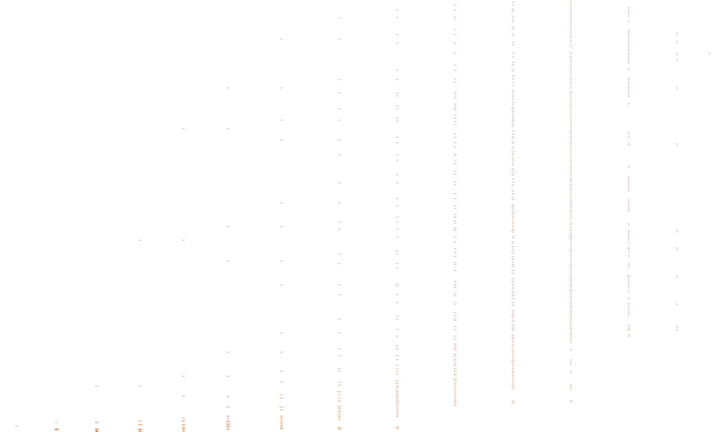

In [222]:
draw_tree(m.estimators_[0], X_train, precision=3)

### Bagging

In [223]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1.4659362590722176, 1.305117863855298, 0.9987906165231244, 0.9976701011437442]


In [224]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])

In [225]:
preds.shape

(10, 415)

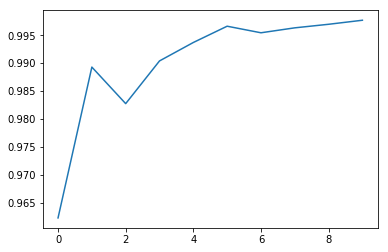

In [230]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [227]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 92 ms, sys: 0 ns, total: 92 ms
Wall time: 111 ms
[1.7861419045003255, 1.6255418929646617, 0.998204581169171, 0.9963856189810105]


In [228]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 117 ms
[2.2150064598140724, 1.4298993978430148, 0.9972388890959222, 0.9972032827156831]


In [229]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 368 ms, sys: 4 ms, total: 372 ms
Wall time: 264 ms
[2.0100432766256895, 0.7832600877487915, 0.997726239734912, 0.9991608306874902]
